In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
covid_data = pd.read_csv("covid_19_data.csv",parse_dates=["ObservationDate"])
print(covid_data.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      2020-01-22          Anhui  Mainland China  1/22/2020 17:00   
1    2      2020-01-22        Beijing  Mainland China  1/22/2020 17:00   
2    3      2020-01-22      Chongqing  Mainland China  1/22/2020 17:00   
3    4      2020-01-22         Fujian  Mainland China  1/22/2020 17:00   
4    5      2020-01-22          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [25]:
covid_data=covid_data.drop(['SNo','Last Update'], axis=1)
print(covid_data)

      ObservationDate      Province/State  Country/Region  Confirmed  Deaths  \
0          2020-01-22               Anhui  Mainland China        1.0     0.0   
1          2020-01-22             Beijing  Mainland China       14.0     0.0   
2          2020-01-22           Chongqing  Mainland China        6.0     0.0   
3          2020-01-22              Fujian  Mainland China        1.0     0.0   
4          2020-01-22               Gansu  Mainland China        0.0     0.0   
...               ...                 ...             ...        ...     ...   
53922      2020-06-30           Zacatecas          Mexico      908.0    96.0   
53923      2020-06-30  Zakarpattia Oblast         Ukraine     2889.0    91.0   
53924      2020-06-30   Zaporizhia Oblast         Ukraine      572.0    17.0   
53925      2020-06-30            Zhejiang  Mainland China     1269.0     1.0   
53926      2020-06-30     Zhytomyr Oblast         Ukraine     1404.0    29.0   

       Recovered  
0            0.0  
1

In [26]:
print(covid_data.describe())

           Confirmed        Deaths      Recovered
count   53927.000000  53927.000000   53927.000000
mean     8629.160625    509.275558    3567.531812
std     28030.847686   2438.846476   20210.864799
min         0.000000      0.000000       0.000000
25%        76.000000      1.000000       0.000000
50%       712.000000     11.000000      75.000000
75%      4039.500000    124.000000     985.000000
max    405843.000000  41128.000000  720631.000000


In [27]:
covid_data.rename({'ObservationDate':'Date','Country/Region':'Country', 'Province/State':'State', 'Confirmed':'Confirmed Cases'}, axis=1, inplace=True)
print(covid_data.head())

        Date      State         Country  Confirmed Cases  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China              1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China             14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China              6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China              1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China              0.0     0.0        0.0


In [28]:
covid_data_country=covid_data.groupby(['Date','Country']).sum().reset_index()
print(covid_data_country)

            Date             Country  Confirmed Cases  Deaths  Recovered
0     2020-01-22           Hong Kong              0.0     0.0        0.0
1     2020-01-22               Japan              2.0     0.0        0.0
2     2020-01-22               Macau              1.0     0.0        0.0
3     2020-01-22      Mainland China            547.0    17.0       28.0
4     2020-01-22         South Korea              1.0     0.0        0.0
...          ...                 ...              ...     ...        ...
22676 2020-06-30  West Bank and Gaza           2428.0     8.0      451.0
22677 2020-06-30      Western Sahara             10.0     1.0        8.0
22678 2020-06-30               Yemen           1158.0   312.0      488.0
22679 2020-06-30              Zambia           1594.0    24.0     1329.0
22680 2020-06-30            Zimbabwe            591.0     7.0      162.0

[22681 rows x 5 columns]


In [29]:
india_cases=covid_data[covid_data['Country']=='India']
india_cases.drop(['State'],axis=1)
print(india_cases)

            Date          State Country  Confirmed Cases  Deaths  Recovered
430   2020-01-30            NaN   India              1.0     0.0        0.0
491   2020-01-31            NaN   India              1.0     0.0        0.0
547   2020-02-01            NaN   India              1.0     0.0        0.0
607   2020-02-02            NaN   India              2.0     0.0        0.0
672   2020-02-03            NaN   India              3.0     0.0        0.0
...          ...            ...     ...              ...     ...        ...
53859 2020-06-30        Tripura   India           1388.0     1.0     1086.0
53873 2020-06-30        Unknown   India           6915.0     0.0        0.0
53880 2020-06-30  Uttar Pradesh   India          23492.0   697.0    16084.0
53881 2020-06-30    Uttarakhand   India           2881.0    41.0     2231.0
53907 2020-06-30    West Bengal   India          18559.0   668.0    12130.0

[888 rows x 6 columns]


In [30]:
india_states = india_cases[india_cases['State'].notna()]
india_states=india_states.drop(['Country'], axis=1)
print(india_states)

            Date                        State  Confirmed Cases  Deaths  \
38811 2020-06-10  Andaman and Nicobar Islands             33.0     0.0   
38812 2020-06-10               Andhra Pradesh           5070.0    77.0   
38828 2020-06-10            Arunachal Pradesh             57.0     0.0   
38829 2020-06-10                        Assam           2937.0     4.0   
38851 2020-06-10                        Bihar           5459.0    32.0   
...          ...                          ...              ...     ...   
53859 2020-06-30                      Tripura           1388.0     1.0   
53873 2020-06-30                      Unknown           6915.0     0.0   
53880 2020-06-30                Uttar Pradesh          23492.0   697.0   
53881 2020-06-30                  Uttarakhand           2881.0    41.0   
53907 2020-06-30                  West Bengal          18559.0   668.0   

       Recovered  
38811       33.0  
38812     2802.0  
38828        1.0  
38829     1085.0  
38851     2864.0

In [31]:
#Cases by states
covid_data_india_states=india_states.groupby(['State']).sum().reset_index()
print(covid_data_india_states)

                                       State  Confirmed Cases    Deaths  \
0                Andaman and Nicobar Islands           1118.0       0.0   
1                             Andhra Pradesh         186961.0    2391.0   
2                          Arunachal Pradesh           2608.0       6.0   
3                                      Assam         110390.0     179.0   
4                                      Bihar         158741.0    1034.0   
5                                 Chandigarh           8140.0     121.0   
6                               Chhattisgarh          43577.0     212.0   
7                         Dadar Nagar Haveli             22.0       0.0   
8   Dadra and Nagar Haveli and Daman and Diu           1959.0       0.0   
9                                      Delhi        1217124.0   41415.0   
10                                       Goa          16591.0      19.0   
11                                   Gujarat         561328.0   33977.0   
12                       

In [32]:
covid_data['State'].value_counts().sort_values(ascending=True)
print(covid_data['State'].value_counts().sort_values(ascending=True))

Jervis Bay Territory              1
Unassigned Location, VT           1
Spartanburg County, SC            1
External territories              1
Collin County, TX                 1
                               ... 
Gansu                           163
Hebei                           163
Grand Princess                  216
Diamond Princess cruise ship    258
Unknown                         291
Name: State, Length: 709, dtype: int64


In [33]:
covid_data['Country'].value_counts().sort_values(ascending=True)
print(covid_data['Country'].value_counts().sort_values(ascending=True))

Republic of Ireland       1
Channel Islands           1
East Timor                1
North Ireland             1
St. Martin                1
                       ... 
Canada                 1680
Japan                  1759
Russia                 2612
Mainland China         4989
US                     7426
Name: Country, Length: 223, dtype: int64


In [34]:
covid_data['Date'].value_counts().sort_values(ascending=True)
print(covid_data['Date'].value_counts().sort_values(ascending=True))

2020-01-22     38
2020-01-24     41
2020-01-25     44
2020-01-23     46
2020-01-26     47
             ... 
2020-06-30    729
2020-06-13    729
2020-06-20    729
2020-06-21    729
2020-06-27    729
Name: Date, Length: 161, dtype: int64


In [35]:
dates = list(covid_data['Date'].dt.day)

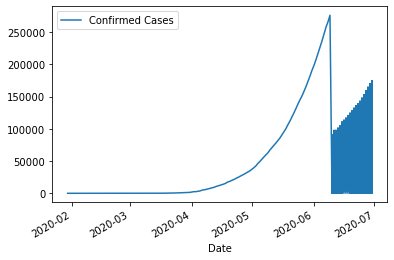

In [36]:
india_cases.plot(x='Date',y='Confirmed Cases')

In [37]:
#After looking at the graph one can actully see the variation post june mid, So we're gonna check the graph further

june_cases=india_cases[(india_cases['Date'] > '2020-06-09') & (india_cases['Date'] <= '2020-06-27')]
june_cases.reset_index()

,index,Date,State,Country,Confirmed Cases,Deaths,Recovered
0,38811,2020-06-10,Andaman and Nicobar Islands,India,33.0,0.0,33.0
1,38812,2020-06-10,Andhra Pradesh,India,5070.0,77.0,2802.0
2,38828,2020-06-10,Arunachal Pradesh,India,57.0,0.0,1.0
3,38829,2020-06-10,Assam,India,2937.0,4.0,1085.0
4,38851,2020-06-10,Bihar,India,5459.0,32.0,2864.0
...,...,...,...,...,...,...,...
643,51672,2020-06-27,Tripura,India,1334.0,1.0,1071.0
644,51686,2020-06-27,Unknown,India,7839.0,0.0,0.0
645,51693,2020-06-27,Uttar Pradesh,India,21549.0,649.0,14215.0
646,51694,2020-06-27,Uttarakhand,India,2791.0,37.0,1912.0


In [38]:
print(june_cases['Confirmed Cases'].value_counts())

44.0       15
70.0        5
135.0       4
38.0        4
502.0       3
           ..
10635.0     1
6824.0      1
1086.0      1
4055.0      1
33.0        1
Name: Confirmed Cases, Length: 543, dtype: int64


In [39]:
june_dates=list(june_cases['Date'].dt.day)

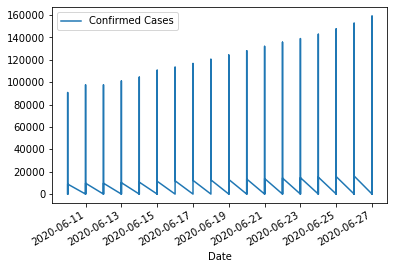

In [40]:
june_cases.plot(x='Date',y='Confirmed Cases')

In [41]:
grouped=june_cases.groupby('State').sum()
print(grouped)

                                          Confirmed Cases   Deaths  Recovered
State                                                                        
Andaman and Nicobar Islands                         855.0      0.0      654.0
Andhra Pradesh                                   145234.0   1855.0    71349.0
Arunachal Pradesh                                  2048.0      3.0      303.0
Assam                                             87205.0    146.0    50169.0
Bihar                                            129846.0    845.0    90225.0
Chandigarh                                         6836.0    103.0     5550.0
Chhattisgarh                                      35294.0    173.0    21243.0
Dadar Nagar Haveli                                   22.0      0.0        2.0
Dadra and Nagar Haveli and Daman and Diu           1365.0      0.0      327.0
Delhi                                            961526.0  33370.0   483776.0
Goa                                               12880.0     10

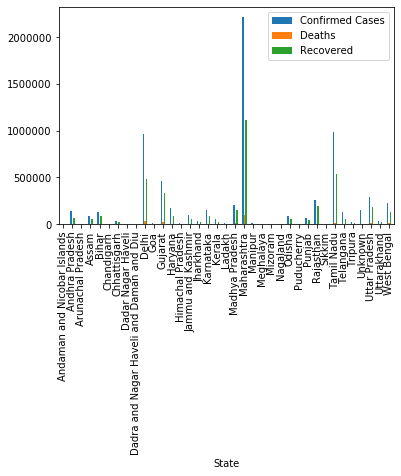

In [42]:
grouped.plot(kind='bar',x=None,y=['Confirmed Cases','Deaths','Recovered'])